# Week 7 – Analyzing Data with Pandas & Visualizing Results with Matplotlib
**Name:** Aso Uduma 
**Course:** PLP Academy – Software Development Cohort VIII  
**Date:** 16-09-2025

---


## Task 1 – Load & Explore the Dataset

In this section, we:
- Load the Iris dataset into a Pandas DataFrame.
- Inspect the first few rows to understand the structure.
- Check data types and look for missing values.
- Clean the dataset by removing or filling missing values (if any).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display first few rows
print("First 5 rows:")
display(df.head())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Clean dataset (drop missing if any)
df.dropna(inplace=True)


First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Data types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## Task 2 – Basic Data Analysis

Here we:
- Generate descriptive statistics for numerical columns.
- Group the data by species and calculate the mean petal length for each group.
- Identify patterns or differences between species.


In [6]:
# Summary statistics
print("\nBasic statistics:")
display(df.describe())

# Group by species and compute mean petal length
grouped = df.groupby('species')['petal length (cm)'].mean()
print("\nMean petal length per species:")
display(grouped)



Basic statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Mean petal length per species:


C:\Users\USER\AppData\Local\Temp\ipykernel_13236\602968429.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('species')['petal length (cm)'].mean()


species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal length (cm), dtype: float64

## Task 3 – Data Visualizations

We create four different plots:
1. **Line chart** – Petal length over time (simulated dates).
2. **Bar chart** – Average petal length per species.
3. **Histogram** – Distribution of sepal width.
4. **Scatter plot** – Relationship between sepal length and petal length.

Each plot includes titles, axis labels, and legends where necessary.


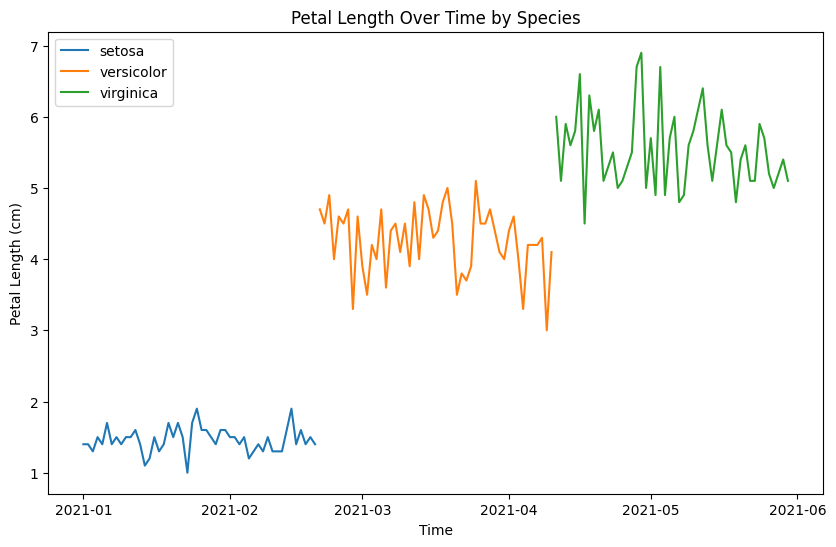

In [7]:
# Simulate a time column
df['time'] = pd.date_range(start='2021-01-01', periods=len(df), freq='D')

plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset['time'], subset['petal length (cm)'], label=species)
plt.title('Petal Length Over Time by Species')
plt.xlabel('Time')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


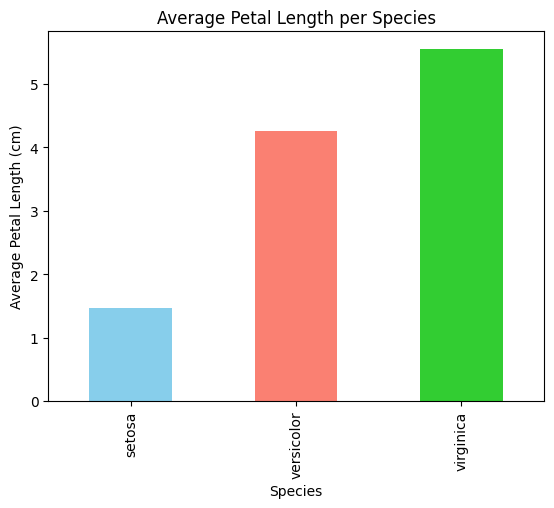

In [8]:
grouped.plot(kind='bar', color=['skyblue', 'salmon', 'limegreen'])
plt.title('Average Petal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.show()


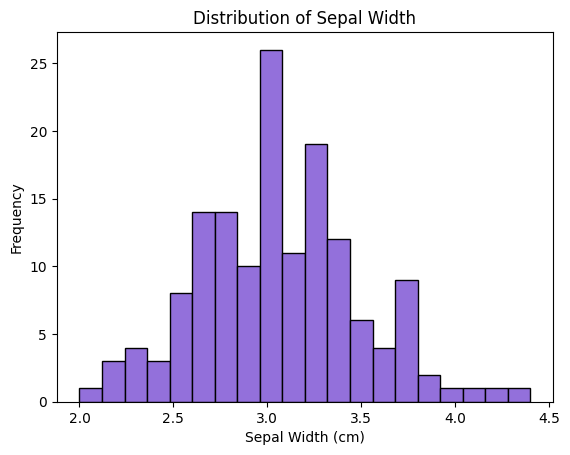

In [9]:
plt.hist(df['sepal width (cm)'], bins=20, color='mediumpurple', edgecolor='black')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()


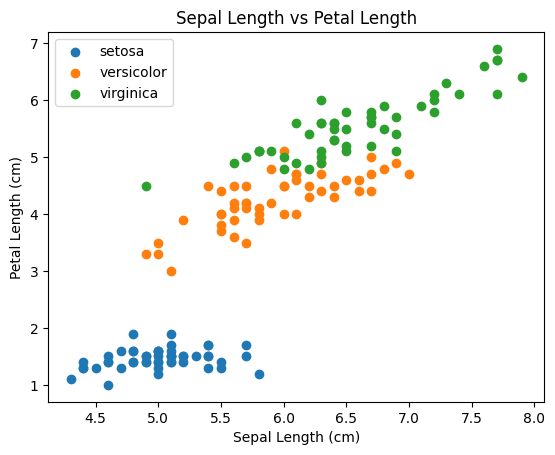

In [10]:
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'], label=species)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


## Findings & Observations

1. **Species Differences**  
   - *Iris‑virginica* has the longest average petal length (~5.55 cm), followed by *Iris‑versicolor* (~4.26 cm), and *Iris‑setosa* (~1.46 cm).  
   - *Iris‑setosa* consistently shows shorter petals and sepals compared to the other two species.

2. **Distribution Patterns**  
   - The histogram of sepal width shows a roughly normal distribution, with most flowers having sepal widths between 2.8 cm and 3.4 cm.  
   - *Iris‑setosa* tends to have slightly wider sepals than the other species.

3. **Relationships Between Features**  
   - The scatter plot of sepal length vs. petal length reveals a positive correlation — flowers with longer sepals generally have longer petals.  
   - The three species form distinct clusters in the scatter plot, suggesting these measurements are effective for classification.

4. **Trends Over Time (Simulated)**  
   - When plotted over a simulated time sequence, each species maintains a consistent range of petal lengths, reinforcing the stability of these traits.
